In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

In [2]:
#N**2 RVs corresponding to 4 sets of likelihood: x_l,x_r | z_l,z_r = 0,0; 0,1/N; 0,2/N; 0,3/N etc
# dimension of image: D
# no. basis: N
# sigma_n: added noise to image
# sigma_y: std of prior on activation

In [3]:
def likelihood(x_l, x_r, W, sigma_n, sigma_y, z_l, z_r):
    N = len(x_l)
    I = np.eye(N)
    cov_lr_0  = np.hstack((z_l**2*sigma_y**2*W@W.T + sigma_n**2*I, z_l*z_r*sigma_y**2*W@W.T))
    cov_lr_1 = np.hstack((z_l*z_r*sigma_y**2*W@W.T, z_r**2*sigma_y**2*W@W.T + sigma_n**2*I))
    cov_lr = np.vstack((cov_lr_0, cov_lr_1)) + np.eye(2*N)*10**(-12)
    
    rv = stats.multivariate_normal(mean=None, cov = cov_lr)
    return rv.pdf(np.hstack((x_l,x_r)))
    

In [4]:
def post_new(x_l, x_r, W, sigma_n, sigma_y, z_l_list):
    post_array = np.zeros((len(z_l_list)))
    for i in range(len(z_l_list)):
        post_array[i] = likelihood(x_l, x_r, W, sigma_n, sigma_y, z_l_list[i], 1-z_l_list[i])
    return post_array/np.sum(post_array)

In [62]:
W = np.eye(2)
x_l = np.array([1,0])*1

sigma_n = 0.2
sigma_y = 0.2*8**0.5

z_l_list = np.arange(0,1.005,0.005)

p_list = []

alpha_list = np.arange(-1,1.01,0.01)
for i in range(200):
    x_r_i = np.array([alpha_list[i],(1-alpha_list[i]**2)**0.5])*0.98
    p_list.append(post_new(x_l, x_r_i, W, sigma_n, sigma_y, z_l_list)/np.max(post_new(x_l, x_r_i, W, sigma_n, sigma_y, z_l_list)))



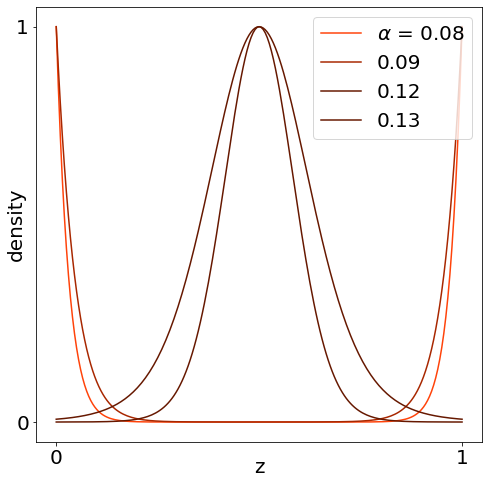

In [32]:
plt.rcParams['font.size'] = '20'
plt.rcParams["figure.figsize"] = (8,8)
c_red = ['#ffc0ad','#ff430a','#a82700','#661800']
fig, ax = plt.subplots()
ax.plot(z_l_list,p_list[108],color = c_red[1])
ax.plot(z_l_list,p_list[109],color = c_red[2])
ax.plot(z_l_list,p_list[112],color = c_red[3])
ax.plot(z_l_list,p_list[113],color = c_red[3])

ax.set_xlabel('z',labelpad=-10) #labelpad=-10: move label upward
ax.set_ylabel('density',labelpad=-10) #labelpad=-10: move label to the right

ax.legend([r'$\alpha$ = 0.08','0.09','0.12','0.13'])

ax.set_yticks([0,1])
ax.set_xticks([0,1])

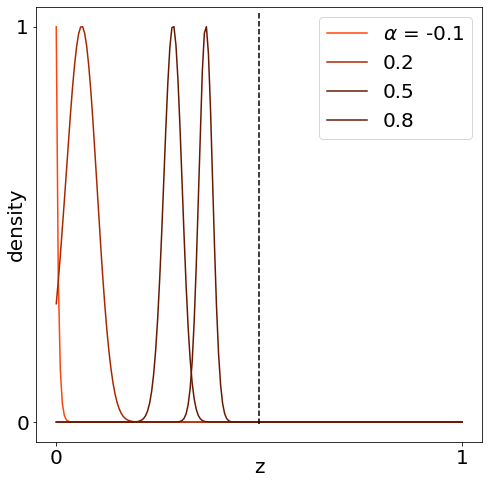

In [97]:
plt.rcParams['font.size'] = '20'
plt.rcParams["figure.figsize"] = (8,8)
c_red = ['#ffc0ad','#ff430a','#a82700','#661800']
fig, ax = plt.subplots()
ax.plot(z_l_list,p_list[90],color = c_red[1])
ax.plot(z_l_list,p_list[95],color = c_red[2])
ax.plot(z_l_list,p_list[150],color = c_red[3])
ax.plot(z_l_list,p_list[180],color = c_red[3])
ax.axvline(x = 0.5,linestyle = '--',color = 'k',ymin=0.04, ymax=0.99)
ax.legend([r'$\alpha$ = -0.1','0.2','0.5','0.8'])
ax.set_xlabel('z',labelpad=-10) #labelpad=-10: move label upward
ax.set_ylabel('density',labelpad=-10) #labelpad=-10: move label to the right
ax.set_yticks([0,1])
ax.set_xticks([0,1])

#fig.savefig('3.svg')

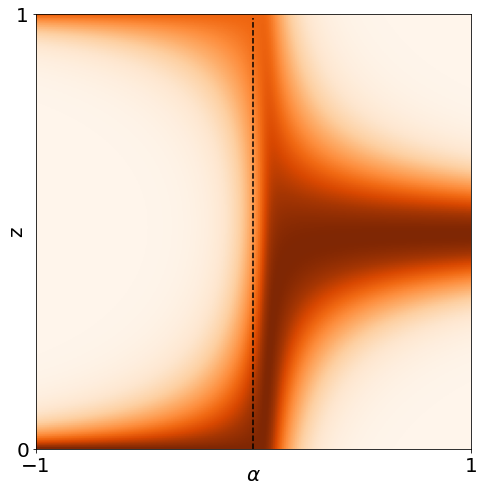

In [63]:
plt.rcParams['font.size'] = '20'
plt.rcParams["figure.figsize"] = (8,8)

fig, ax = plt.subplots()

im = ax.imshow(np.array(p_list).T, extent = [-1,1,0,1],cmap='Oranges',aspect = 2)
ax.axvline(x = 0,linestyle = '--',color = 'k',ymin=0., ymax=0.99)
ax.set_xlabel(r'$\alpha$',labelpad=-10) #labelpad=-10: move label upward
ax.set_ylabel('z',labelpad=-10) #labelpad=-10: move label to the right
ax.set_yticks([0,1])
ax.set_xticks([-1,1])
plt.show()

#fig.savefig('2.svg')


In [48]:
#test on levelt's first proposition
W = np.eye(2)
x_l = np.array([0.6,0])

sigma_n = 0.2
sigma_y = 0.2*8**0.5

c_list = np.arange(0.8,1.2,0.002)

p_list_2 = []

alpha_list = np.arange(-1,1.01,0.01)
for i in range(200):
    x_r_i = np.array([-0.6,0])*c_list[i]
    p_list_2.append(post_new(x_l, x_r_i, W, sigma_n, sigma_y, z_l_list)/np.max(post_new(x_l, x_r_i, W, sigma_n, sigma_y, z_l_list)))

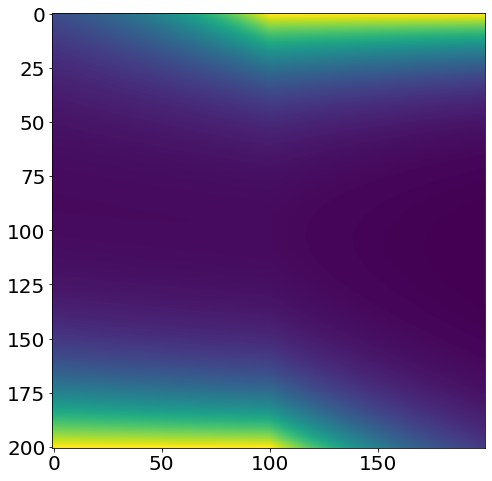

In [49]:
plt.imshow(np.array(p_list_2).T)

In [8]:
#f(z_l,z_r,sigma_n,sigma_y,alpha) plots in following cells

In [9]:
def pow(z_l,z_r,sigma_n,sigma_y,alpha):
    a = sigma_y**2*(z_l**2+z_r**2) + 2*sigma_n**2 - 2*z_l*z_r*sigma_y**2*alpha
    b = sigma_n**2*(sigma_n**2 + (z_l**2 + z_r**2)*sigma_y**2)
    return a/b

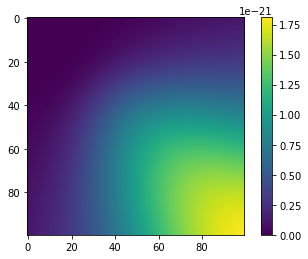

In [10]:
n  = 100
z_l_m, z_r_m = np.meshgrid(np.arange(n)/(n-1),np.arange(n)/(n-1))
plt.imshow(np.exp(-0.5*pow(z_l_m,z_r_m,0.1,1,0.05)))
plt.colorbar()

Text(0, 0.5, 'z')

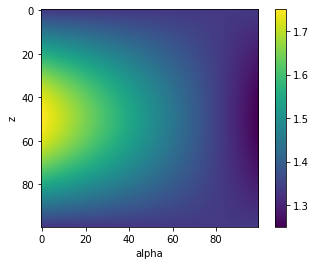

In [11]:
s = 2
alpha, z = np.meshgrid(np.linspace(-0.5,0.5,100),np.linspace(0,1,100))

a = (s*(1-2*(1+alpha)*z+2*(1+alpha)*z**2)+2)/(1+s*(1-2*z+2*z**2))
plt.imshow(a)
plt.colorbar()
plt.xlabel('alpha')
plt.ylabel('z')

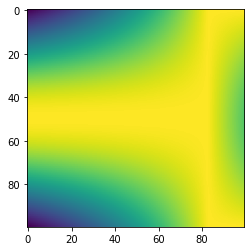

In [12]:
plt.imshow(a/np.max(a,axis = 0))